# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании. Моя цель построить модель, которая предсказывает остался ли клиент доволен полетом.

Задачи проекта:
- Предобработка данных
- Обучение модели
- Тестирование модели
- Вывод



## Импорт библиотек, константы

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  make_scorer, f1_score, precision_score, roc_auc_score, recall_score, roc_curve
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
pd.set_option('display.max_columns', None)

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/edu_stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:

df.head()

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied


# Предобработка данных

In [7]:
df.columns = ['id', 'gender', 'age', 'customer_type', 'type_of_travel', 'class', 'flight_distance', 'departure_delay_in_minutes',
               'arrival_delay_in_minutes', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
               'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
               'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness', 'satisfaction']

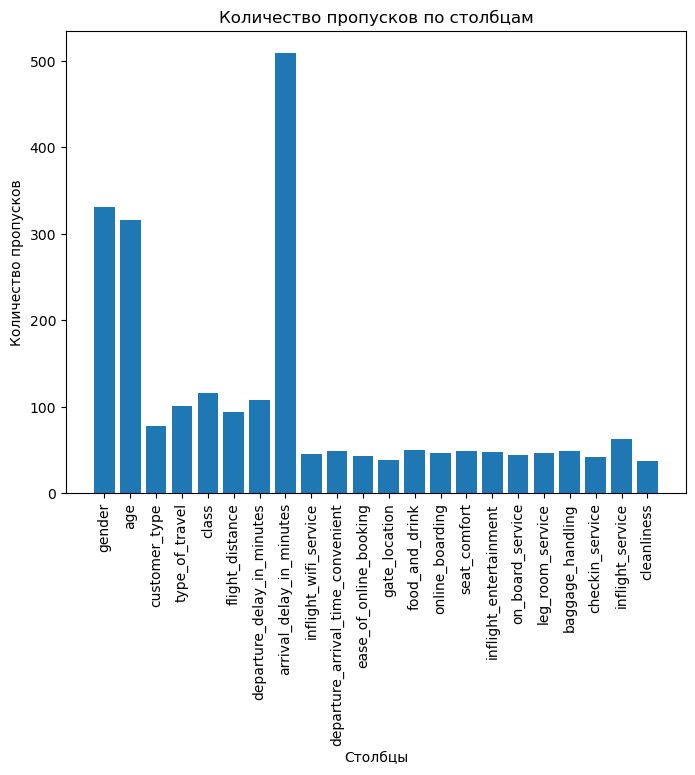

In [8]:
miss = df.isnull().sum()


miss_filtered = miss[miss != 0]

plt.figure(figsize=(8, 6))
plt.bar(miss_filtered.index, miss_filtered.values)
plt.title('Количество пропусков по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')

plt.xticks(rotation=90)

plt.show()

In [9]:
df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']].describe()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Пропуски есть, перед заполнением пропусков стоит очистить датафрейм от аномалий.

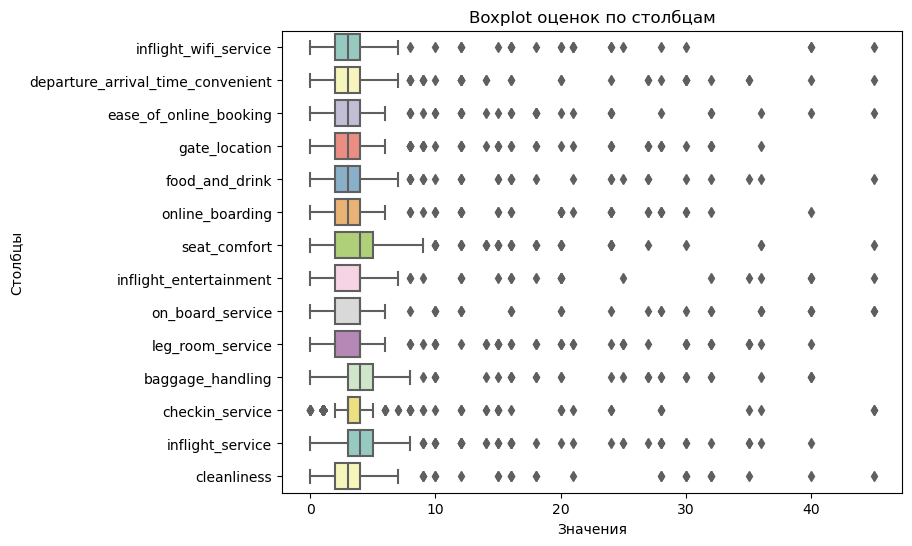

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']], palette='Set3', orient='h')

plt.title('Boxplot оценок по столбцам')
plt.xlabel('Значения')
plt.ylabel('Столбцы')

plt.show()

In [11]:
 df.groupby('inflight_wifi_service')['inflight_wifi_service'].count()

inflight_wifi_service
0.0      3918
1.0     22318
2.0     32306
3.0     32156
4.0     24758
5.0     14345
6.0         7
7.0         3
8.0         1
10.0        1
12.0        3
15.0        1
16.0        3
18.0        1
20.0        2
21.0        4
24.0        2
25.0        1
28.0        1
30.0        1
40.0        2
45.0        1
Name: inflight_wifi_service, dtype: int64

In [12]:
df['inflight_wifi_service'].isnull().sum()

45

Присутствуют выбросы. Шкала оценок должна быть от 1 до 5 включительно. Числа, кратные 10 я разделю на 10, пропуски и 0 заполню округленным средним.

In [13]:
def anomalies(col, df):
    df.loc[(df[col] % 10 == 0), col] = df[col] / 10
    df.loc[df[col] == 0, col] = np.nan
    df = df[df[col].isnull() | df[col].between(1, 5)]
    df.loc[df[col].isnull(), col] = round(df[col].mean())
    return df

columns = ['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']

for col in columns:
    df = anomalies(col, df)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129488 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129488 non-null  int64  
 1   gender                             129157 non-null  object 
 2   age                                129173 non-null  float64
 3   customer_type                      129411 non-null  object 
 4   type_of_travel                     129387 non-null  object 
 5   class                              129372 non-null  object 
 6   flight_distance                    129394 non-null  float64
 7   departure_delay_in_minutes         129382 non-null  float64
 8   arrival_delay_in_minutes           128980 non-null  float64
 9   inflight_wifi_service              129488 non-null  float64
 10  departure_arrival_time_convenient  129488 non-null  float64
 11  ease_of_online_booking             1294

In [15]:
df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']].describe()

,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness
count,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000,129488.000000
mean,2.818709,3.211348,2.887966,2.976863,3.207942,3.323644,3.441284,3.358450,3.382669,3.364242,3.632267,3.306082,3.642693,3.286745
std,1.239620,1.351101,1.271763,1.278343,1.325788,1.252781,1.319062,1.333358,1.286961,1.296432,1.179859,1.265959,1.176250,1.313005
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


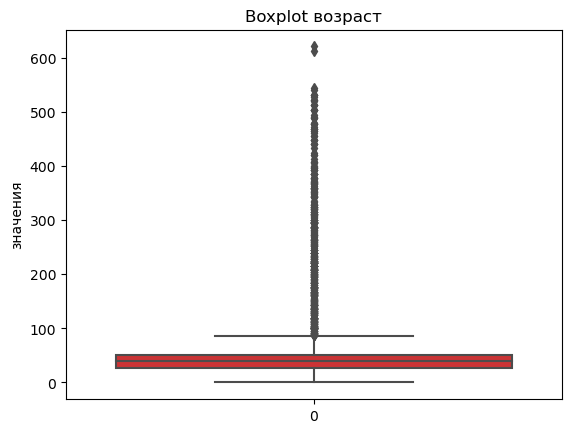

In [16]:
sns.boxplot(data=df['age'], palette='Set1')

plt.title('Boxplot возраст')

plt.ylabel('значения')

plt.show()

In [17]:
df['age'].describe()


count    129173.000000
mean         40.114234
std          20.379162
min           0.000000
25%          27.000000
50%          40.000000
75%          51.000000
max         621.000000
Name: age, dtype: float64

In [18]:
df = df[(df['age']>11) &(df['age']<86)]

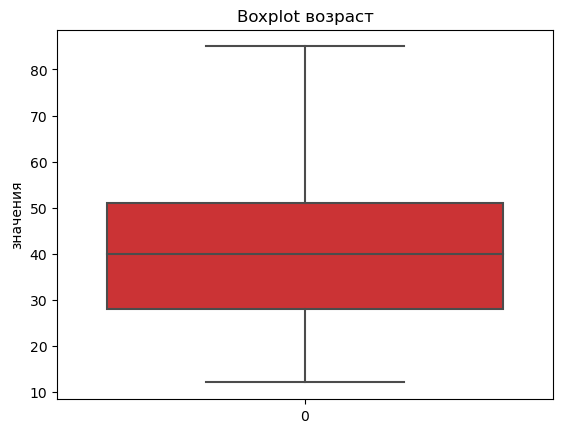

In [19]:
sns.boxplot(data=df['age'], palette='Set1')

plt.title('Boxplot возраст')

plt.ylabel('значения')

plt.show()

In [20]:
df['age'].describe()

count    124712.000000
mean         40.400138
std          14.354006
min          12.000000
25%          28.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: age, dtype: float64

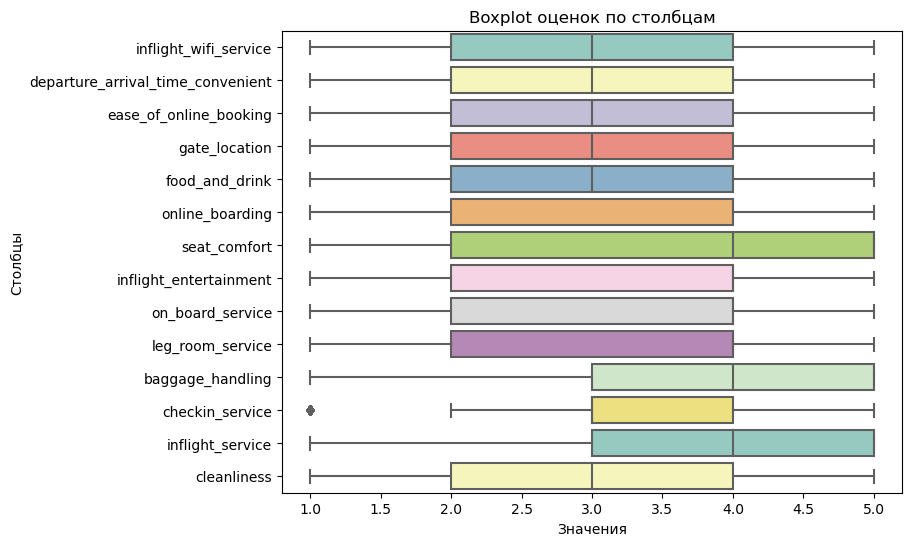

In [21]:
plt.figure(figsize=(8, 6))

sns.boxplot(data=df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']], palette='Set3', orient='h')

plt.title('Boxplot оценок по столбцам')
plt.xlabel('Значения')
plt.ylabel('Столбцы')

plt.show()

Теперь значения находятся в нужном диапазоне, медианы столбцов равны 3 или 4.

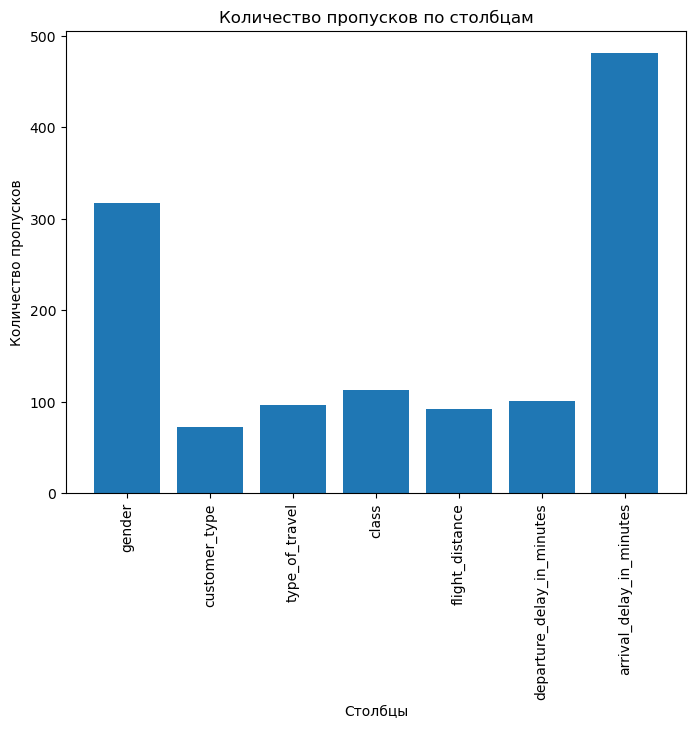

In [22]:
miss = df.isnull().sum()


miss_filtered = miss[miss != 0]

plt.figure(figsize=(8, 6))
plt.bar(miss_filtered.index, miss_filtered.values)
plt.title('Количество пропусков по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')

plt.xticks(rotation=90)

plt.show()

Много пропусков в столбцах с задержкой рейсов, заполню их 0, скорее всего задержки не было. Добавлю категорию unknown в столбцы gender, customer_type и класс. Остальные пропуски удалю. После этого проверю оставшиеся столбцы на аномалии.

In [23]:
df['departure_delay_in_minutes'].describe()

count    124611.000000
mean         15.820385
std          94.565416
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max       22227.000000
Name: departure_delay_in_minutes, dtype: float64

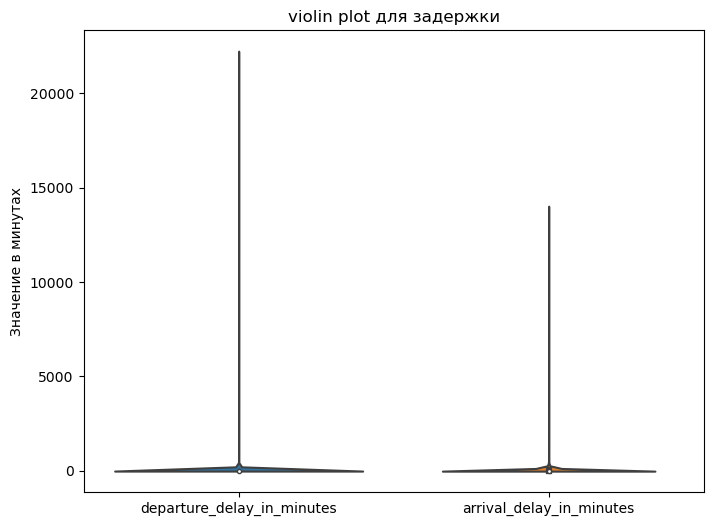

In [24]:
plt.figure(figsize=(8, 6))


sns.violinplot(data=df[['departure_delay_in_minutes', 'arrival_delay_in_minutes']])






plt.ylabel('Значение в минутах')
plt.title('violin plot для задержки')


plt.show()

Есть аномально большие значения, пусть максимальная задержка будет 100 минут, иногда так бывает

In [25]:
df['departure_delay_in_minutes'] = df['departure_delay_in_minutes'].fillna(0)
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].fillna(0)
df = df[(df['departure_delay_in_minutes'] >= 0) & (df['arrival_delay_in_minutes'] >= 0) &
  (df['departure_delay_in_minutes'] < 100) &  (df['arrival_delay_in_minutes'] < 100)]



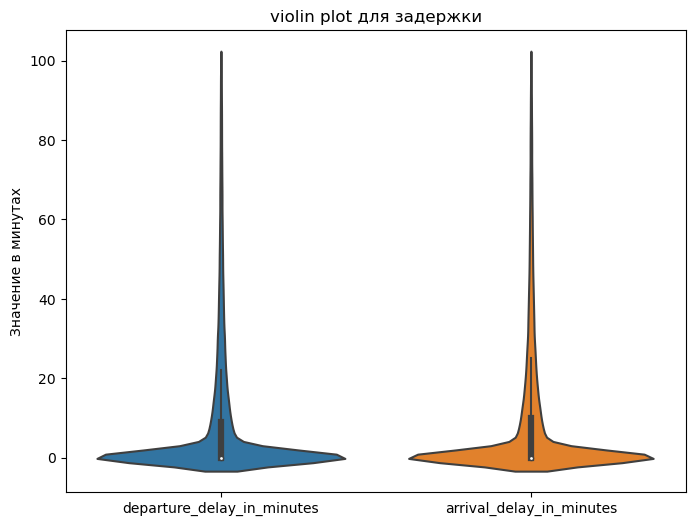

In [26]:
plt.figure(figsize=(8, 6))


sns.violinplot(data=df[['departure_delay_in_minutes', 'arrival_delay_in_minutes']])






plt.ylabel('Значение в минутах')
plt.title('violin plot для задержки')


plt.show()

In [27]:
df.groupby('departure_delay_in_minutes')['departure_delay_in_minutes'].count()

departure_delay_in_minutes
0.0     70463
1.0      3492
2.0      2742
3.0      2423
4.0      2194
        ...  
95.0       60
96.0       67
97.0       47
98.0       45
99.0       33
Name: departure_delay_in_minutes, Length: 100, dtype: int64

In [28]:
df = df.dropna()


In [29]:
df

,id,gender,age,customer_type,type_of_travel,class,flight_distance,departure_delay_in_minutes,arrival_delay_in_minutes,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,-
129876,129877,Male,41.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,5.0,3.0,4.0,2.0,3.0,2.0,2.0,5.0,5.0,5.0,5.0,4.0,2.0,-
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,5.0,2.0,1.0,3.0,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,31.0,22.0,5.0,4.0,4.0,1.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,satisfied


In [30]:
def plot_category_counts(df, column, ax):

    


    category_counts = df[column].value_counts()


    sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)


    ax.set_xlabel('Category')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of {column}')

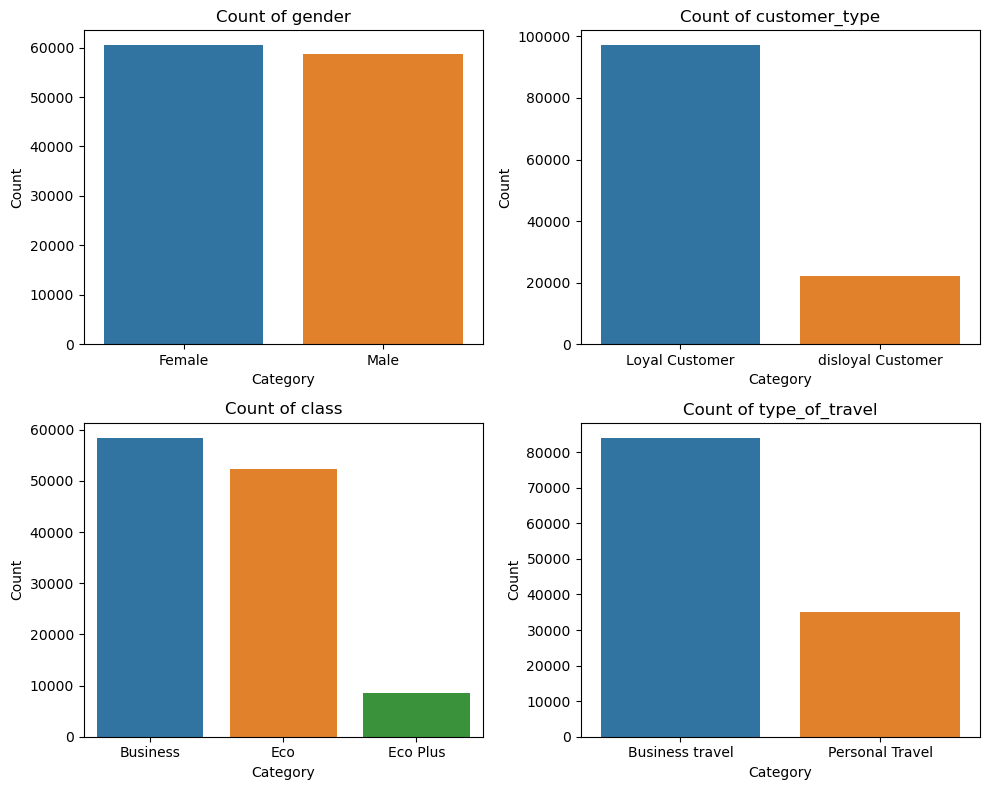

In [31]:
columns_to_plot = ['gender', 'customer_type', 'class', 'type_of_travel']
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for i, column in enumerate(columns_to_plot):
    ax = axs[i // 2, i % 2]
    plot_category_counts(df, column, ax)


fig.tight_layout()
plt.show()

Пропуски в категориальных столбцах удалены, посмотрим что осталось.

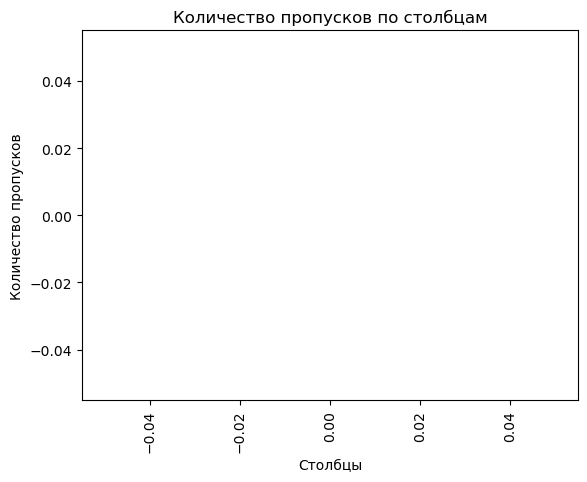

In [32]:
miss = df.isnull().sum()


miss_filtered = miss[miss != 0]


plt.bar(miss_filtered.index, miss_filtered.values)
plt.title('Количество пропусков по столбцам')
plt.xlabel('Столбцы')
plt.ylabel('Количество пропусков')
plt.xticks(rotation=90)


plt.show()

Посмотрим на последний столбец.

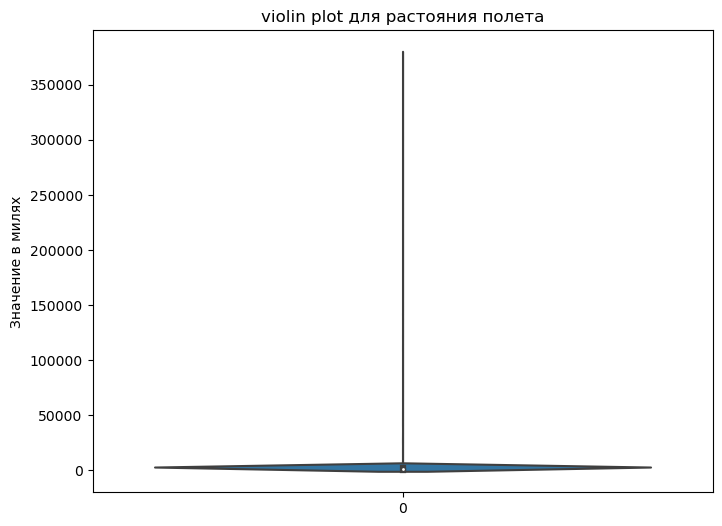

In [33]:

plt.figure(figsize=(8, 6))


sns.violinplot(data=df['flight_distance'])






plt.ylabel('Значение в милях')
plt.title('violin plot для растояния полета')


plt.show()

сочтем минимальной траекторией полета 80 миль, а максимальную оставим 4500

In [34]:
df=df[(df['flight_distance'] < 4500) & (df['flight_distance'] > 81)]

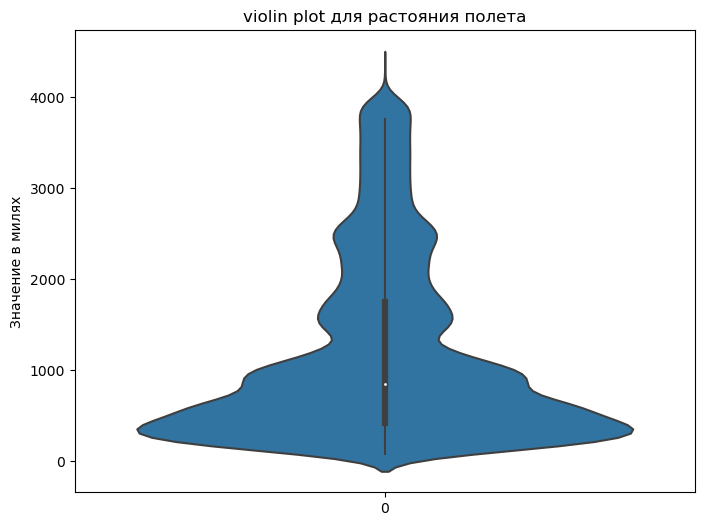

In [35]:
plt.figure(figsize=(8, 6))


sns.violinplot(data=df['flight_distance'])






plt.ylabel('Значение в милях')
plt.title('violin plot для растояния полета')


plt.show()

In [36]:
df.groupby('satisfaction')['satisfaction'].count()

satisfaction
-                          23808
neutral or dissatisfied    52430
satisfied                  42289
Name: satisfaction, dtype: int64

Нужно распределить неизвестную категорию. Добавлю столбец со средней оценкой клиента.

In [37]:
df['mean'] = df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']].mean(axis=1)

C:\Users\iyaro\AppData\Local\Temp\ipykernel_4352\3823950237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df[['inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118527 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 118527 non-null  int64  
 1   gender                             118527 non-null  object 
 2   age                                118527 non-null  float64
 3   customer_type                      118527 non-null  object 
 4   type_of_travel                     118527 non-null  object 
 5   class                              118527 non-null  object 
 6   flight_distance                    118527 non-null  float64
 7   departure_delay_in_minutes         118527 non-null  float64
 8   arrival_delay_in_minutes           118527 non-null  float64
 9   inflight_wifi_service              118527 non-null  float64
 10  departure_arrival_time_convenient  118527 non-null  float64
 11  ease_of_online_booking             1185

In [39]:
replacement_dict = {'neutral or dissatisfied': 0, 'satisfied': 1}
df.loc[df['satisfaction'] == '-', 'satisfaction'] = df.loc[df['satisfaction'] == '-', 'satisfaction'].replace(replacement_dict)
df[['mean','satisfaction']][df['satisfaction']=='-'].sample(30)

,mean,satisfaction
120194,3.428571,-
4114,3.142857,-
91723,3.928571,-
79745,2.214286,-
13651,3.428571,-
113931,3.571429,-
113715,3.071429,-
86596,2.928571,-
46020,2.928571,-
78703,1.714286,-


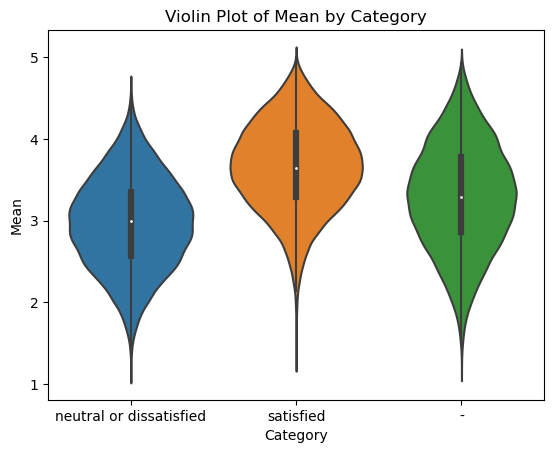

In [40]:
sns.violinplot(x='satisfaction', y='mean', data=df)

# Добавляем метки осей и заголовок
plt.xlabel('Category')
plt.ylabel('Mean')
plt.title('Violin Plot of Mean by Category')

# Отображаем график
plt.show()

Значения '- 'в satisfaction заменим в зависимости от mean. Если больше 3.5, то к категории satisfied.

In [41]:
df.loc[(df['satisfaction'] == '-') & (df['mean'] > 3.5), 'satisfaction'] = 'satisfied'
df.loc[(df['satisfaction'] == '-') & (df['mean'] <= 3.5), 'satisfaction'] = 'neutral or dissatisfied'
df.loc[df['satisfaction'] == 'satisfied', 'satisfaction'] = 1
df.loc[df['satisfaction'] == 'neutral or dissatisfied', 'satisfaction'] = 0
df['satisfaction'] = df['satisfaction'].astype(int)




C:\Users\iyaro\AppData\Local\Temp\ipykernel_4352\483474976.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['satisfaction'] = df['satisfaction'].astype(int)


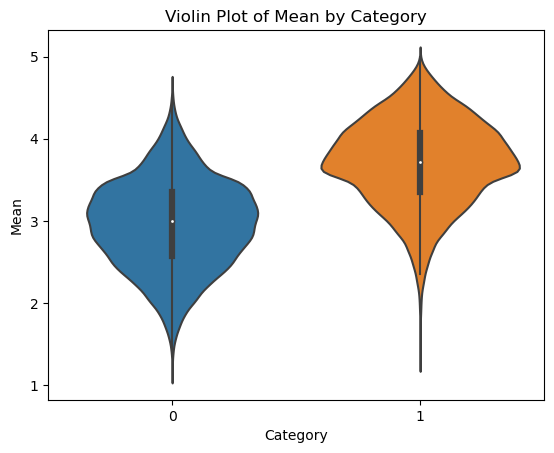

In [42]:
sns.violinplot(x='satisfaction', y='mean', data=df)

# Добавляем метки осей и заголовок
plt.xlabel('Category')
plt.ylabel('Mean')
plt.title('Violin Plot of Mean by Category')

# Отображаем график
plt.show()

In [43]:
df = df.dropna()

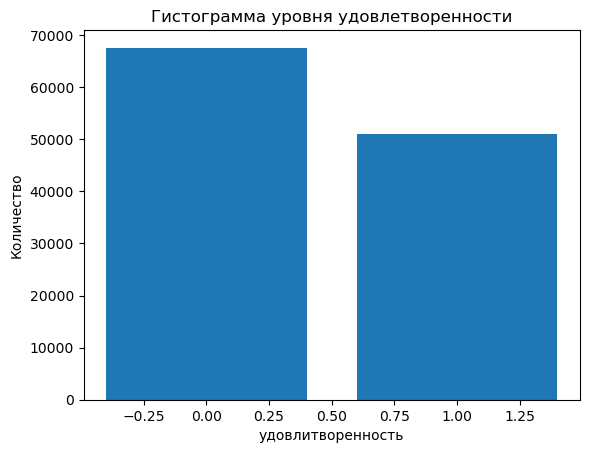

In [44]:
sat = df.groupby('satisfaction')['satisfaction'].count()
plt.bar(sat.index, sat.values)


plt.xlabel('удовлитворенность')
plt.ylabel('Количество')
plt.title('Гистограмма уровня удовлетворенности')

plt.show()

классы более менее сбалансированы, однако метрика f1 надежнее

Аномалии устранены, пропуски тоже. Потеряно около 6% датафрейма. Дальше мы приведем признаки к нужному для обучения виду и обучим модели.

# Обучение моделей


In [45]:
x = df.drop(['satisfaction', 'id'], axis=1)
y = df['satisfaction']
obj_feat = list(df.loc[:, df.dtypes == 'object'].columns.values)
for feature in obj_feat:
    x[feature] = pd.Series(df[feature], dtype='category')
x.iloc[:, 8:22] = x.iloc[:, 8:22].astype('category')

In [46]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.5, random_state = RANDOM_STATE, stratify=y)
x_test, x_valid, y_test, y_valid = train_test_split(x_valid, y_valid, test_size = 0.5, random_state = RANDOM_STATE, stratify=y_valid)


In [47]:
x_train.info(),
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59263 entries, 119607 to 88248
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             59263 non-null  category
 1   age                                59263 non-null  float64 
 2   customer_type                      59263 non-null  category
 3   type_of_travel                     59263 non-null  category
 4   class                              59263 non-null  category
 5   flight_distance                    59263 non-null  float64 
 6   departure_delay_in_minutes         59263 non-null  float64 
 7   arrival_delay_in_minutes           59263 non-null  float64 
 8   inflight_wifi_service              59263 non-null  category
 9   departure_arrival_time_convenient  59263 non-null  category
 10  ease_of_online_booking             59263 non-null  category
 11  gate_location                      5

In [48]:
x_train[x_train['departure_delay_in_minutes']>0]['departure_delay_in_minutes'].sample(20)

32674      2.0
98328      2.0
22648     15.0
106677    40.0
61603      6.0
82125      3.0
116293     6.0
74812     23.0
112519     6.0
22163     38.0
95374      1.0
107040    23.0
114491    51.0
66923      1.0
97871     17.0
27307      7.0
114010    10.0
100292    27.0
97778     10.0
110510    10.0
Name: departure_delay_in_minutes, dtype: float64

In [49]:
x_train.shape, x_test.shape, x_valid.shape

((59263, 23), (29632, 23), (29632, 23))

In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59263 entries, 119607 to 88248
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             59263 non-null  category
 1   age                                59263 non-null  float64 
 2   customer_type                      59263 non-null  category
 3   type_of_travel                     59263 non-null  category
 4   class                              59263 non-null  category
 5   flight_distance                    59263 non-null  float64 
 6   departure_delay_in_minutes         59263 non-null  float64 
 7   arrival_delay_in_minutes           59263 non-null  float64 
 8   inflight_wifi_service              59263 non-null  category
 9   departure_arrival_time_convenient  59263 non-null  category
 10  ease_of_online_booking             59263 non-null  category
 11  gate_location                      5

In [51]:
x_train = x_train.drop(['mean'], axis=1)


In [52]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59263 entries, 119607 to 88248
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             59263 non-null  category
 1   age                                59263 non-null  float64 
 2   customer_type                      59263 non-null  category
 3   type_of_travel                     59263 non-null  category
 4   class                              59263 non-null  category
 5   flight_distance                    59263 non-null  float64 
 6   departure_delay_in_minutes         59263 non-null  float64 
 7   arrival_delay_in_minutes           59263 non-null  float64 
 8   inflight_wifi_service              59263 non-null  category
 9   departure_arrival_time_convenient  59263 non-null  category
 10  ease_of_online_booking             59263 non-null  category
 11  gate_location                      5

In [53]:
x_valid = x_valid.drop(['mean'], axis=1)

In [54]:
x_test = x_test.drop(['mean'], axis=1)

In [55]:
%%time
cat_features = [0, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

f1_scorer = make_scorer(f1_score)

train_data = lgb.Dataset(x_train, label=y_train)
train_data.set_categorical_feature(cat_features)

model_lgb = lgb.LGBMClassifier()

param_grid_lgb = {
    'boosting_type': ['dart'],
    'num_leaves': [30, 100, 150],
    'learning_rate': np.arange(0.1, 0.5, 0.1),
    'n_estimators': [100, 150, 200]
}

grid_lgb = GridSearchCV(estimator=model_lgb, param_grid=param_grid_lgb, scoring=f1_scorer, cv=3, verbose=2)

grid_lgb.fit(train_data.data, train_data.label)



Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\iyaro\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
  _log_warning('categorical_feature in Dataset is overridden.\n'


[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=100; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=100; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=100; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=150; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=150; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=100, num_leaves=150; total time=   0.9s
[CV] END boosting_type=dart, learning_rate=0.1, n_estimators=150, num_leaves=30; total time=  

[CV] END boosting_type=dart, learning_rate=0.30000000000000004, n_estimators=200, num_leaves=150; total time=   2.5s
[CV] END boosting_type=dart, learning_rate=0.30000000000000004, n_estimators=200, num_leaves=150; total time=   2.8s
[CV] END boosting_type=dart, learning_rate=0.30000000000000004, n_estimators=200, num_leaves=150; total time=   2.5s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=30; total time=   0.4s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=100; total time=   0.6s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=100; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.4, n_estimators=100, num_leaves=100; total time=   0.7s
[CV] END boosting_type=dart, learning_rate=0.4

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'boosting_type': ['dart'],
                         'learning_rate': array([0.1, 0.2, 0.3, 0.4]),
                         'n_estimators': [100, 150, 200],
                         'num_leaves': [30, 100, 150]},
             scoring=make_scorer(f1_score), verbose=2)

In [56]:

best_model_lgb = grid_lgb.best_estimator_
y_pred = best_model_lgb.predict(x_valid)


recall_lgb = recall_score(y_valid, y_pred)
precision_lgb = precision_score(y_valid, y_pred)
roc_auc_lgb = roc_auc_score(y_valid, best_model_lgb.predict_proba(x_valid)[:,1])
print("Best parameters:", grid_lgb.best_params_)
print("Best f1 score lgb:", grid_lgb.best_score_)
print("Best Recall lgb", recall_lgb)
print("Best Precision lgb:", precision_lgb)
print("Best Roc-Auc", roc_auc_lgb)



Best parameters: {'boosting_type': 'dart', 'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}
Best f1 score lgb: 0.8878887969945448
Best Recall lgb 0.8774933249568085
Best Precision lgb: 0.9050704681678277
Best Roc-Auc 0.9671365692654621


In [57]:
with open(r'C:\Users\iyaro\OneDrive\Документы\-\Классификация_удовлитворенности_полетом(миникурс_ВШЭ)\model_weights.pkl', 'wb') as file:
    pickle.dump(best_model_lgb, file)


Подготовим признаки для случайного леса.

In [58]:
x_train_ord = x_train.copy()
x_valid_ord = x_valid.copy()
x_test_ord = x_test.copy()

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=RANDOM_STATE)
cat_columns = ['gender', 'customer_type', 'type_of_travel','class', 'inflight_wifi_service', 'departure_arrival_time_convenient', 'ease_of_online_booking', 'gate_location',
   'food_and_drink', 'online_boarding', 'seat_comfort', 'inflight_entertainment', 'on_board_service', 'leg_room_service',
   'baggage_handling', 'checkin_service', 'inflight_service', 'cleanliness']
encoder.fit(x_train[cat_columns])

x_train_ord[cat_columns] = encoder.transform(x_train_ord[cat_columns])
x_valid_ord[cat_columns] = encoder.transform(x_valid_ord[cat_columns])
x_test_ord[cat_columns] = encoder.transform(x_test_ord[cat_columns])

In [59]:
scaler = StandardScaler()
scaler.fit(x_train_ord)

x_train_sca = scaler.transform(x_train_ord)
x_valid_sca = scaler.transform(x_valid_ord)
x_test_sca = scaler.transform(x_test_ord)

In [60]:
%%time
model_forest =  RandomForestClassifier(random_state=RANDOM_STATE)
param_forest_grid = {'max_depth': np.arange(17, 21, 2),
                 'n_estimators':[40,70,110,130,150]}
grid_forest = GridSearchCV(estimator=model_forest, param_grid=param_forest_grid, cv=3, verbose=2,scoring=f1_scorer)
grid_forest.fit(x_train_sca, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ......................max_depth=17, n_estimators=40; total time=   1.2s
[CV] END ......................max_depth=17, n_estimators=40; total time=   1.1s
[CV] END ......................max_depth=17, n_estimators=40; total time=   1.1s
[CV] END ......................max_depth=17, n_estimators=70; total time=   2.1s
[CV] END ......................max_depth=17, n_estimators=70; total time=   2.0s
[CV] END ......................max_depth=17, n_estimators=70; total time=   2.0s
[CV] END .....................max_depth=17, n_estimators=110; total time=   3.4s
[CV] END .....................max_depth=17, n_estimators=110; total time=   3.3s
[CV] END .....................max_depth=17, n_estimators=110; total time=   3.4s
[CV] END .....................max_depth=17, n_estimators=130; total time=   4.0s
[CV] END .....................max_depth=17, n_estimators=130; total time=   4.0s
[CV] END .....................max_depth=17, n_es

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': array([17, 19]),
                         'n_estimators': [40, 70, 110, 130, 150]},
             scoring=make_scorer(f1_score), verbose=2)

In [61]:
best_model_for = grid_forest.best_estimator_
y_pred_for = best_model_for.predict(x_valid_sca)


recall_for = recall_score(y_valid, y_pred_for)
precision_for = precision_score(y_valid, y_pred_for)
roc_auc_for = roc_auc_score(y_valid, best_model_lgb.predict_proba(x_valid_sca)[:,1])

print("Best parameters:", grid_forest.best_params_)
print("Best f1 score forest:", grid_forest.best_score_)
print("Best Recall forest", recall_for)
print("Best Precision forest:", precision_for)
print("Best Roc-Auc", roc_auc_for)


Best parameters: {'max_depth': 17, 'n_estimators': 150}
Best f1 score forest: 0.8829243976948611
Best Recall forest 0.8713679912046489
Best Precision forest: 0.8994082840236687
Best Roc-Auc 0.7509247504539613


In [62]:
with open(r'C:\Users\iyaro\OneDrive\Документы\-\Классификация_удовлитворенности_полетом(миникурс_ВШЭ)\model_weights1.pkl', 'wb') as file:
    pickle.dump(best_model_for, file)


In [63]:
x_train_ohe = x_train.copy()
x_valid_ohe = x_valid.copy()
x_test_ohe = x_test.copy()

num_features = ['age', 'flight_distance', 'departure_delay_in_minutes','arrival_delay_in_minutes']





ohe = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
ohe_cat_features = ohe.fit(x_train_ohe[cat_columns])

x_train_ohe_ohe = pd.DataFrame(ohe_cat_features.transform(x_train_ohe[cat_columns])).reset_index(drop=True)
x_train_ohe = pd.concat([x_train_ohe_ohe, x_train_ohe[num_features].reset_index(drop=True)], axis=1)

x_valid_ohe_ohe = pd.DataFrame(ohe_cat_features.transform(x_valid_ohe[cat_columns])).reset_index(drop=True)
x_valid_ohe = pd.concat([x_valid_ohe_ohe, x_valid_ohe[num_features].reset_index(drop=True)], axis=1)

x_test_ohe_ohe = pd.DataFrame(ohe_cat_features.transform(x_test_ohe[cat_columns])).reset_index(drop=True)
x_test_ohe = pd.concat([x_test_ohe_ohe, x_test_ohe[num_features].reset_index(drop=True)], axis=1)


x_valid_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29632 entries, 0 to 29631
Data columns (total 83 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   0                           29632 non-null  float64
 1   1                           29632 non-null  float64
 2   2                           29632 non-null  float64
 3   3                           29632 non-null  float64
 4   4                           29632 non-null  float64
 5   5                           29632 non-null  float64
 6   6                           29632 non-null  float64
 7   7                           29632 non-null  float64
 8   8                           29632 non-null  float64
 9   9                           29632 non-null  float64
 10  10                          29632 non-null  float64
 11  11                          29632 non-null  float64
 12  12                          29632 non-null  float64
 13  13                          296

In [64]:
%%time
x_train_ohe.columns = x_train_ohe.columns.astype(str)
x_valid_ohe.columns = x_valid_ohe.columns.astype(str)
pipe = Pipeline([
    ('classifier', LogisticRegression())
])


param_grid = {
    'classifier__C': uniform(loc=0, scale=4),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__fit_intercept': [True, False],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': randint(100, 1000),
}


search = RandomizedSearchCV(pipe, param_distributions=param_grid, n_iter=10, random_state=RANDOM_STATE, verbose=2, cv=3)


search.fit(x_train_ohe, y_train)



Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END classifier__C=1.49816047538945, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=206, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__C=1.49816047538945, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=206, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__C=1.49816047538945, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=206, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.4s
[CV] END classifier__C=2.387400631785948, classifier__class_weight=balanced, classifier__fit_intercept=True, classifier__max_iter=314, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=2.387400631785948, classifier__class_weight=balanced, classifier__fit_intercept=True, classifier__m

C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.4647045830997407, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=763, classifier__penalty=l1, classifier__solver=saga; total time=  33.9s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.4647045830997407, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=763, classifier__penalty=l1, classifier__solver=saga; total time=  33.8s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.4647045830997407, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=763, classifier__penalty=l1, classifier__solver=saga; total time=  33.6s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.22564631610840102, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=513, classifier__penalty=l2, classifier__solver=saga; total time=  15.9s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.22564631610840102, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=513, classifier__penalty=l2, classifier__solver=saga; total time=  15.9s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.22564631610840102, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=513, classifier__penalty=l2, classifier__solver=saga; total time=  16.3s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.7272998688284025, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=559, classifier__penalty=l2, classifier__solver=saga; total time=  17.6s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.7272998688284025, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=559, classifier__penalty=l2, classifier__solver=saga; total time=  17.9s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.7272998688284025, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=559, classifier__penalty=l2, classifier__solver=saga; total time=  17.5s
[CV] END classifier__C=0.028265220878869624, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=574, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.2s
[CV] END classifier__C=0.028265220878869624, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=574, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__C=0.028265220878869624, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=574, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.5579754426081673, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=882, classifier__penalty=l2, classifier__solver=saga; total time=  27.5s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.5579754426081673, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=882, classifier__penalty=l2, classifier__solver=saga; total time=  27.6s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.5579754426081673, classifier__class_weight=balanced, classifier__fit_intercept=False, classifier__max_iter=882, classifier__penalty=l2, classifier__solver=saga; total time=  27.6s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.1407038455720544, classifier__class_weight=None, classifier__fit_intercept=False, classifier__max_iter=666, classifier__penalty=l2, classifier__solver=saga; total time=  20.9s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.1407038455720544, classifier__class_weight=None, classifier__fit_intercept=False, classifier__max_iter=666, classifier__penalty=l2, classifier__solver=saga; total time=  20.3s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=3.1407038455720544, classifier__class_weight=None, classifier__fit_intercept=False, classifier__max_iter=666, classifier__penalty=l2, classifier__solver=saga; total time=  20.0s
[CV] END classifier__C=1.8670515729919197, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=746, classifier__penalty=l1, classifier__solver=liblinear; total time=   1.6s
[CV] END classifier__C=1.8670515729919197, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=746, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.3s
[CV] END classifier__C=1.8670515729919197, classifier__class_weight=None, classifier__fit_intercept=True, classifier__max_iter=746, classifier__penalty=l1, classifier__solver=liblinear; total time=   1.3s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.26020637194111806, classifier__class_weight=balanced, classifier__fit_intercept=True, classifier__max_iter=415, classifier__penalty=l2, classifier__solver=saga; total time=  12.4s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.26020637194111806, classifier__class_weight=balanced, classifier__fit_intercept=True, classifier__max_iter=415, classifier__penalty=l2, classifier__solver=saga; total time=  12.3s


C:\Users\iyaro\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END classifier__C=0.26020637194111806, classifier__class_weight=balanced, classifier__fit_intercept=True, classifier__max_iter=415, classifier__penalty=l2, classifier__solver=saga; total time=  12.4s
Wall time: 6min 34s


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('classifier',
                                              LogisticRegression())]),
                   param_distributions={'classifier__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000018A73BD97F0>,
                                        'classifier__class_weight': [None,
                                                                     'balanced'],
                                        'classifier__fit_intercept': [True,
                                                                      False],
                                        'classifier__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018A7671D640>,
                                        'classifier__penalty': ['l1', 'l2'],
                                        'classifier__solver': ['liblinear',
                                                               'saga']},
                   random_state=42, verbose=2)

In [65]:
best_model_log = search.best_estimator_
y_pred_log = best_model_log.predict(x_valid_ohe)


recall_log = recall_score(y_valid, y_pred_log)
precision_log = precision_score(y_valid, y_pred_log)
roc_auc_log = roc_auc_score(y_valid, best_model_log.predict_proba(x_valid_ohe)[:,1])

print("Best parameters:", search.best_params_)
print("Best f1 score LogisticRegression:", search.best_score_)
print("Best Recall LogisticRegression", recall_log)
print("Best Precision LogisticRegression:", precision_log)
print("Best Roc-Auc LogisticRegression", roc_auc_log)

Best parameters: {'classifier__C': 1.8670515729919197, 'classifier__class_weight': None, 'classifier__fit_intercept': True, 'classifier__max_iter': 746, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best f1 score LogisticRegression: 0.8801106627633962
Best Recall LogisticRegression 0.8444322286791267
Best Precision LogisticRegression: 0.8729501542458191
Best Roc-Auc LogisticRegression 0.9471625808026775


In [66]:
result = [['LGB', grid_lgb.best_score_, recall_lgb, precision_lgb, roc_auc_lgb, '12:47', grid_lgb.best_params_],
           ['RandomForest', grid_forest.best_score_, recall_for, precision_for, roc_auc_for, '7:24',grid_forest.best_params_],
           ['LogisticRegression', search.best_score_,  recall_log, precision_log, roc_auc_log, '10:30', search.best_params_]]
result_df = pd.DataFrame(result, columns=['Model', 'Score', 'Recall', 'Precision', 'ROC-AUC', 'Hyperparameter tuning time', 'Hyperparameters', ])
result_df

,Model,Score,Recall,Precision,ROC-AUC,Hyperparameter tuning time,Hyperparameters
0,LGB,0.887889,0.877493,0.905070,0.967137,12:47,"{'boosting_type': 'dart', 'learning_rate': 0.2..."
1,RandomForest,0.882924,0.871368,0.899408,0.750925,7:24,"{'max_depth': 17, 'n_estimators': 150}"
2,LogisticRegression,0.880111,0.844432,0.872950,0.947163,10:30,"{'classifier__C': 1.8670515729919197, 'classif..."


Все метрики качества выше у LGB с гипперпараметрами {'boosting_type': 'dart', 'learning_rate': 0.2, 'n_estimators': 200, 'num_leaves': 30}, время обучения 12 минут 47 секунд. Перейдем к тестироваеию этой модели.




# Тестирование модели

In [67]:
x_features = pd.concat([x_train, x_valid], axis=0)
y_features = pd.concat([y_train, y_valid], axis=0)
df_features = pd.concat([x_features, y_features], axis=1)


In [68]:
df_features.columns

Index(['gender', 'age', 'customer_type', 'type_of_travel', 'class',
       'flight_distance', 'departure_delay_in_minutes',
       'arrival_delay_in_minutes', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'on_board_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'satisfaction'],
      dtype='object')

In [69]:
df_path = r'C:\Users\iyaro\OneDrive\Документы\-\Классификация_удовлитворенности_полетом(миникурс_ВШЭ)\df_features.csv'


df_features.to_csv(df_path, index=False)


In [81]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88895 entries, 119607 to 31504
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   gender                             88895 non-null  category
 1   age                                88895 non-null  float64 
 2   customer_type                      88895 non-null  category
 3   type_of_travel                     88895 non-null  category
 4   class                              88895 non-null  category
 5   flight_distance                    88895 non-null  float64 
 6   departure_delay_in_minutes         88895 non-null  float64 
 7   arrival_delay_in_minutes           88895 non-null  float64 
 8   inflight_wifi_service              88895 non-null  category
 9   departure_arrival_time_convenient  88895 non-null  category
 10  ease_of_online_booking             88895 non-null  category
 11  gate_location                      8

In [85]:
a = pd.read_csv(r'C:\Users\iyaro\OneDrive\Документы\-\Классификация_удовлитворенности_полетом(миникурс_ВШЭ)\df_features.csv')
a['class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [72]:
%%time
train_data_for_test = lgb.Dataset(x_features, label=y_features)
train_data_for_test.set_categorical_feature(cat_features)
test_lgb = lgb.LGBMClassifier(**grid_lgb.best_params_)
test_lgb.fit(train_data_for_test.data, train_data_for_test.label)
y_test_pred = test_lgb.predict(x_test)
recall_test = recall_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, test_lgb.predict_proba(x_test)[:,1])
f1_test = f1_score(y_test, y_test_pred)

print("Best f1 score lgb на test:", f1_test)
print("Best Recall lgb на test:", recall_test)
print("Best Precision lgb на test:", precision_test)
print("Best Roc-Auc lgb на test:", roc_auc_test)

C:\Users\iyaro\anaconda3\lib\site-packages\lightgbm\basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [0, 2, 3, 4, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
  _log_warning('categorical_feature in Dataset is overridden.\n'


Best f1 score lgb на test: 0.8906885821431422
Best Recall lgb на test: 0.8766294958379143
Best Precision lgb на test: 0.9052059682127798
Best Roc-Auc lgb на test: 0.9669707121041831
Wall time: 3.17 s


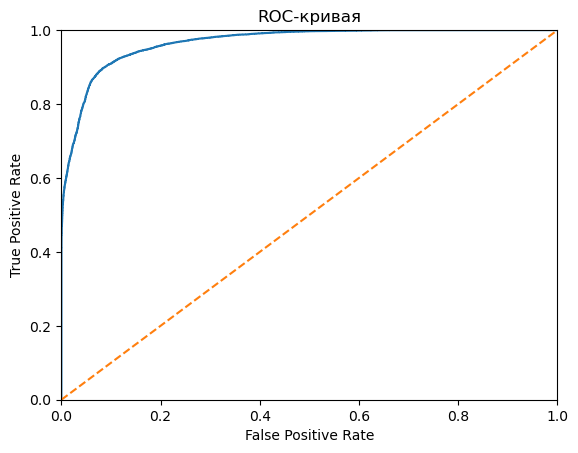

In [73]:

fpr, tpr, thresholds = roc_curve(y_test,  test_lgb.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [74]:
model = DummyClassifier(strategy = 'constant', constant = 1)
model.fit(x_features, y_features)
y_pred = model.predict(x_test)
f1_dum = f1_score(y_test, y_pred)
print("F1 score: ", f1_dum)

F1 score:  0.601142425529906


Модель лучше константной на 30 %. Хороший результат. Подбор гипперпараметров занимает всего лишь 12 минут. а F1 на тестовой выборке 0.89, хороший результат.

# Вывод
- Данные загружены и обработаны от аномалий, пропуски заполнены
- Обучены 3 модели с перебором гипперпараметров
- Применены техники прямого и порядкого кодирования, также масштабирование
- Модели проанализированы и выбрана модель для тестировки
- На тестовых данных модель lgb показала хорошие результаты
- Модель протестирована и готова к внедрению в продакшн.